$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N°3 | Visualización, pre-procesamiento de datos, creación de modelo 
y métricas de evaluación}$$


_Integrantes:_

* _Giovanni Taco_

* _Francisco Ruiz_

#### Carga de librerias

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importacion del dataset

In [59]:
df = pd.read_csv("train.csv")
df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [60]:
df.isnull().any() # Se verifican que filas tienen valores nulos

id                False
sudden_fever      False
headache          False
mouth_bleed       False
nose_bleed        False
                  ...  
ulcers            False
toenail_loss      False
speech_problem    False
bullseye_rash     False
prognosis         False
Length: 66, dtype: bool

In [61]:
# Se verifican cuantos valores únicos hay en cada feature. Esto podría ayudarnos a saber
# si necesitamos un algoritmo de clasificación o regresión, además de identificar la variable Target
for col in df.columns:
      print(col, ":",df[col].nunique())

id : 707
sudden_fever : 2
headache : 2
mouth_bleed : 2
nose_bleed : 2
muscle_pain : 2
joint_pain : 2
vomiting : 2
rash : 2
diarrhea : 2
hypotension : 2
pleural_effusion : 2
ascites : 2
gastro_bleeding : 2
swelling : 2
nausea : 2
chills : 2
myalgia : 2
digestion_trouble : 2
fatigue : 2
skin_lesions : 2
stomach_pain : 2
orbital_pain : 2
neck_pain : 2
weakness : 2
back_pain : 2
weight_loss : 2
gum_bleed : 2
jaundice : 2
coma : 2
diziness : 2
inflammation : 2
red_eyes : 2
loss_of_appetite : 2
urination_loss : 2
slow_heart_rate : 2
abdominal_pain : 2
light_sensitivity : 2
yellow_skin : 2
yellow_eyes : 2
facial_distortion : 2
microcephaly : 2
rigor : 2
bitter_tongue : 2
convulsion : 2
anemia : 2
cocacola_urine : 2
hypoglycemia : 2
prostraction : 2
hyperpyrexia : 2
stiff_neck : 2
irritability : 2
confusion : 2
tremor : 2
paralysis : 2
lymph_swells : 2
breathing_restriction : 2
toe_inflammation : 2
finger_inflammation : 2
lips_irritation : 2
itchiness : 2
ulcers : 2
toenail_loss : 2
speech_pro

In [62]:
# Ahora debemos revisar si es que existen datos repetidos
df.duplicated().sum()

0

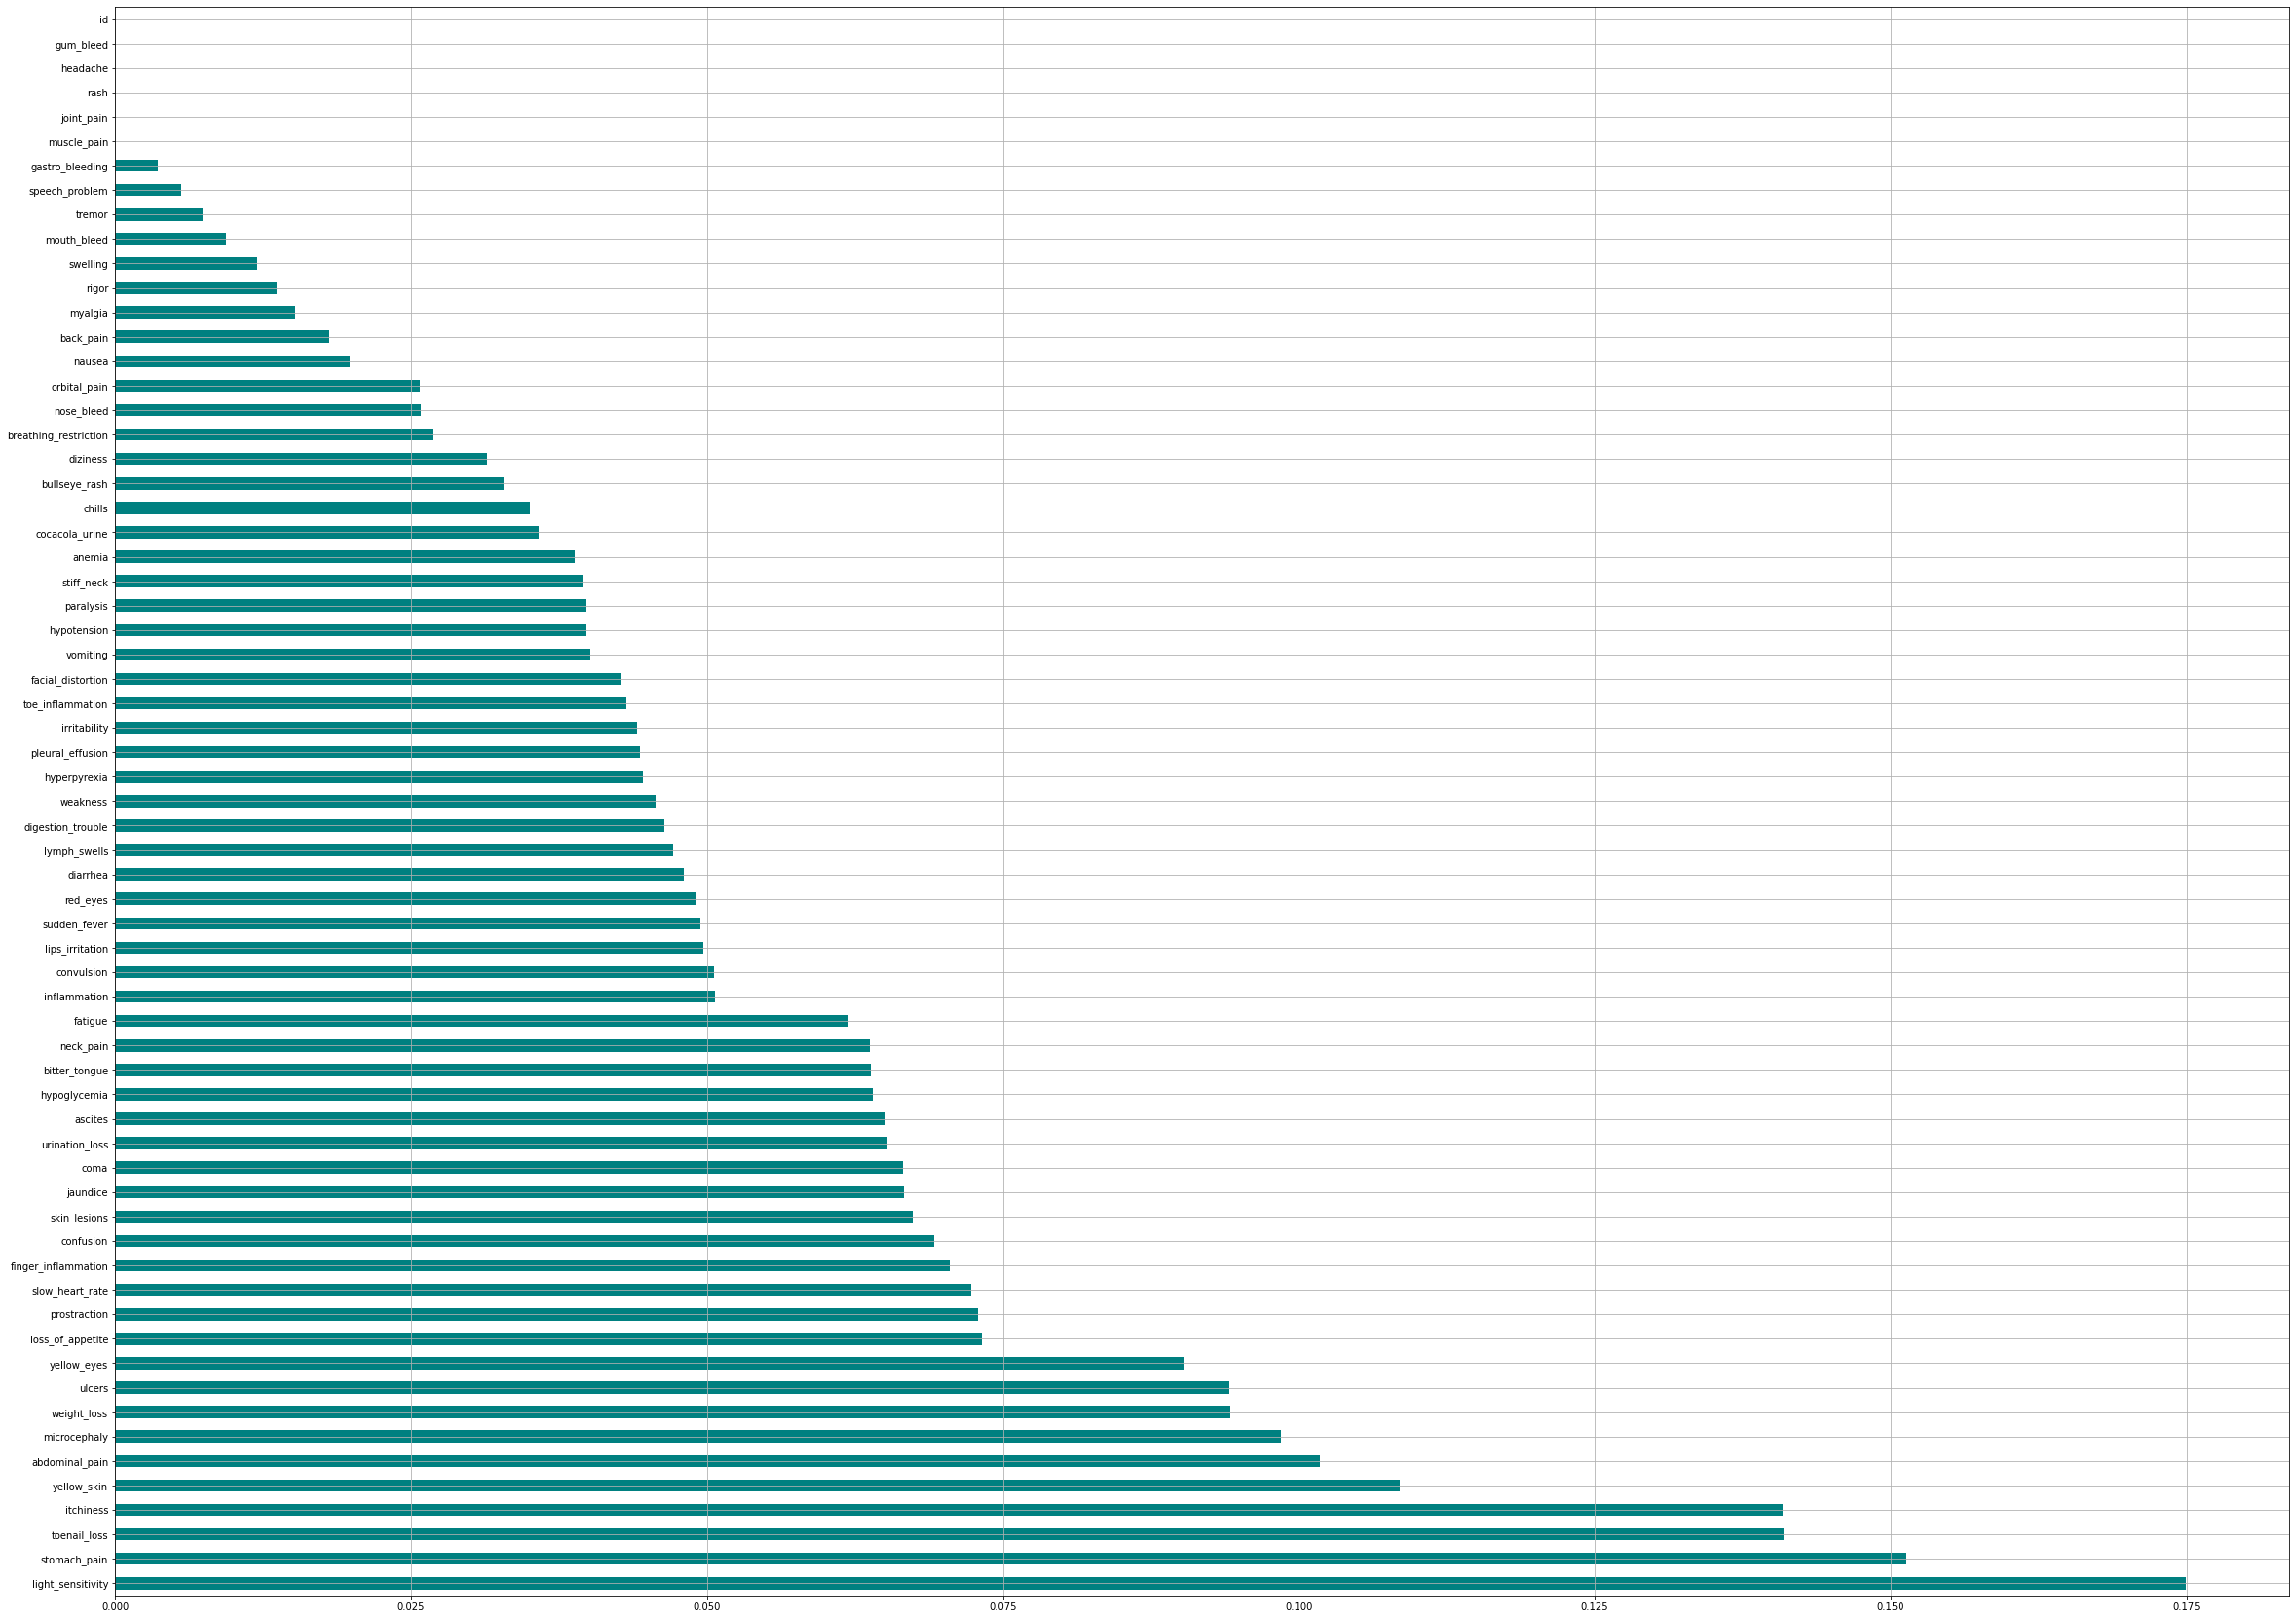

In [72]:
#Obtenemos los parametros con mayor relacion con respecto a la variable target
from sklearn.feature_selection import mutual_info_classif
plt.figure(figsize=(40,30))
importances=mutual_info_classif(df.iloc[:,:-1],df.iloc[:,-1],discrete_features=False, random_state=0)
feat_importances=pd.Series(importances,df.columns[:-1]) 
#Ordenamos de manera descendente 
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.plot(kind='barh',color='teal')
plt.grid()
plt.show()

In [73]:
feat_importances[:20] #Encontramos las 20 caracteristicas que más se relacionan con la variable Target


light_sensitivity      0.174933
stomach_pain           0.151326
toenail_loss           0.140991
itchiness              0.140876
yellow_skin            0.108552
abdominal_pain         0.101764
microcephaly           0.098452
weight_loss            0.094226
ulcers                 0.094097
yellow_eyes            0.090243
loss_of_appetite       0.073252
prostraction           0.072928
slow_heart_rate        0.072356
finger_inflammation    0.070507
confusion              0.069203
skin_lesions           0.067388
jaundice               0.066636
coma                   0.066587
urination_loss         0.065210
ascites                0.065069
dtype: float64

In [74]:
x = df[["light_sensitivity", "stomach_pain", "toenail_loss", "itchiness", "yellow_skin",
"abdominal_pain", "microcephaly", "weight_loss", "ulcers", "yellow_eyes", "loss_of_appetite",
"prostraction", "slow_heart_rate", "finger_inflammation", "confusion", "skin_lesions", "jaundice",
"coma", "urination_loss", "ascites"]]
y = df [["prognosis"]]

x

,light_sensitivity,stomach_pain,toenail_loss,itchiness,yellow_skin,abdominal_pain,microcephaly,weight_loss,ulcers,yellow_eyes,loss_of_appetite,prostraction,slow_heart_rate,finger_inflammation,confusion,skin_lesions,jaundice,coma,urination_loss,ascites
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
703,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
704,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [95]:
df_new=pd.concat([pd.DataFrame(x,columns=["light_sensitivity", "stomach_pain", "toenail_loss", "itchiness", "yellow_skin",
"abdominal_pain", "microcephaly", "weight_loss", "ulcers", "yellow_eyes", "loss_of_appetite",
"prostraction", "slow_heart_rate", "finger_inflammation", "confusion", "skin_lesions", "jaundice",
"coma", "urination_loss", "ascites"]),pd.DataFrame(y,columns=['prognosis'])],axis=1)
df_new

,light_sensitivity,stomach_pain,toenail_loss,itchiness,yellow_skin,abdominal_pain,microcephaly,weight_loss,ulcers,yellow_eyes,...,prostraction,slow_heart_rate,finger_inflammation,confusion,skin_lesions,jaundice,coma,urination_loss,ascites,prognosis
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,Lyme_disease
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Tungiasis
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,Lyme_disease
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Zika
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rift_Valley_fever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Plague
703,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Malaria
704,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,Zika
705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,Plague


In [99]:
#Realizamos LabelEncoding para trabajar con variables categoricas
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df_new.columns: 
    if df_new[col].dtype == 'object':
        df_new[col] = encoder.fit_transform(df_new[col].values) # realizamos un labelEncoding a la variable target
df_new

,light_sensitivity,stomach_pain,toenail_loss,itchiness,yellow_skin,abdominal_pain,microcephaly,weight_loss,ulcers,yellow_eyes,...,prostraction,slow_heart_rate,finger_inflammation,confusion,skin_lesions,jaundice,coma,urination_loss,ascites,prognosis
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,3
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,10
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5
703,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
704,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,10
705,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,5


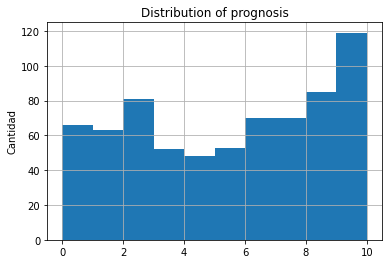

In [101]:
plt.hist(df_new['prognosis'])
plt.title(('Distribution of ' +  'prognosis'))
plt.grid()
plt.ylabel("Cantidad")
plt.show()


IndexError: index 4 is out of bounds for axis 0 with size 4

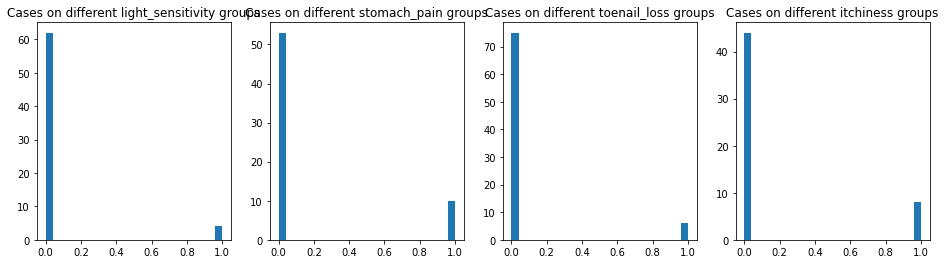

In [114]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
count = 0
for col in df_new.columns:
    aux = df_new[df_new["prognosis"] == count]
    axs[count].hist(aux[col], bins=25)
    axs[count].set_title(('Cases on different ' +  col + ' groups'))
    count += 1
    plt.show()